In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

## Loading the CSV file into a pandas DataFrame

In [2]:
# Load the CSV file into a pandas DataFrame
# Update the path below to the correct location of your CSV file
df_benin = pd.read_csv('../src/benin-malanville.csv')
df_benin.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary Statistics

In [3]:
df_benin.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


The `df_benin.describe()` output provides summary statistics for the numerical columns in the dataset:

- **Count**: All main sensor columns (e.g., GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, etc.) have 525,600 non-null values, indicating no missing data in these columns.
- **Mean, Std, Min, Max**: Each column’s mean, standard deviation, minimum, and maximum values are shown, helping to understand the central tendency and spread of the data.
- **Quartiles**: The 25th, 50th (median), and 75th percentiles are provided for each column, giving insight into the data distribution.
- **Comments**: The `Comments` column contains only null values and is not useful for analysis.
- **Data Types**: Most columns are `float64`, with a few `int64` (e.g., BP, Cleaning), and `Timestamp` is an object (string).

This summary helps identify the range, distribution, and potential anomalies in the dataset.

##  Missing-Value Report

In [4]:
# Check for missing values in the DataFrame
df_benin.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### Missing Value Report for df_benin

The output shows the number of missing (NaN) values in each column of the dataset:

- **Most columns (e.g., GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, etc.) have 0 missing values**, indicating complete data for these sensor readings.
- **The Comments column has 525,600 missing values**, meaning it is entirely empty and does not contain any useful information.
- **No other columns have missing values**, so no imputation or removal is required for the main sensor data.

**Conclusion:**  
The dataset is very complete except for the Comments column, which can be ignored or dropped for further analysis. No additional handling for missing values is necessary for the main variables.

## Outlier Detection & Basic Cleaning

In [5]:
# Detect outliers in key columns using z-score method
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outlier_flags = pd.DataFrame(index=df_benin.index)

for col in cols_to_check:
    z = zscore(df_benin[col])
    outlier_flags[f'{col}_outlier'] = np.abs(z) > 3

# Count outliers per column
outlier_counts = outlier_flags.sum()
print("Outlier counts per column:\n", outlier_counts)

Outlier counts per column:
 GHI_outlier         89
DNI_outlier          0
DHI_outlier       3738
ModA_outlier        27
ModB_outlier        63
WS_outlier        3109
WSgust_outlier    3500
dtype: int64


## Z-Score Outlier Detection for Key Columns & Impute them with the median

Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust.

In [6]:
# Columns to analyze
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores
z_scores = (df_benin[cols] - df_benin[cols].mean()) / df_benin[cols].std()

# Flag rows with any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)

# View outliers
df_outliers = df_benin[outliers]

# Impute outliers with column median
for col in cols:
    median = df_benin[col].median()
    df_benin.loc[outliers, col] = median

## Exporting cleaned DataFrame

In [7]:
df_benin.to_csv('../cleaned_data/benin_clean.csv', index=False)

## Time Series Analysis

To perform Time Series Analysis on GHI (Global Horizontal Irradiance) vs. Timestamp, you'll:

1. Parse time
2. Visualize GHI over time (line/bar plots)
3. Group by month/hour to explore trends
4. Look for anomalies (unexpected peaks/dips)

### 1. GHI over Time (Line chart)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18136\4034755218.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Admin\OneDrive\10 Academy\Week 0\GitHub Rrepository\Solar_Strategy_Insights\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


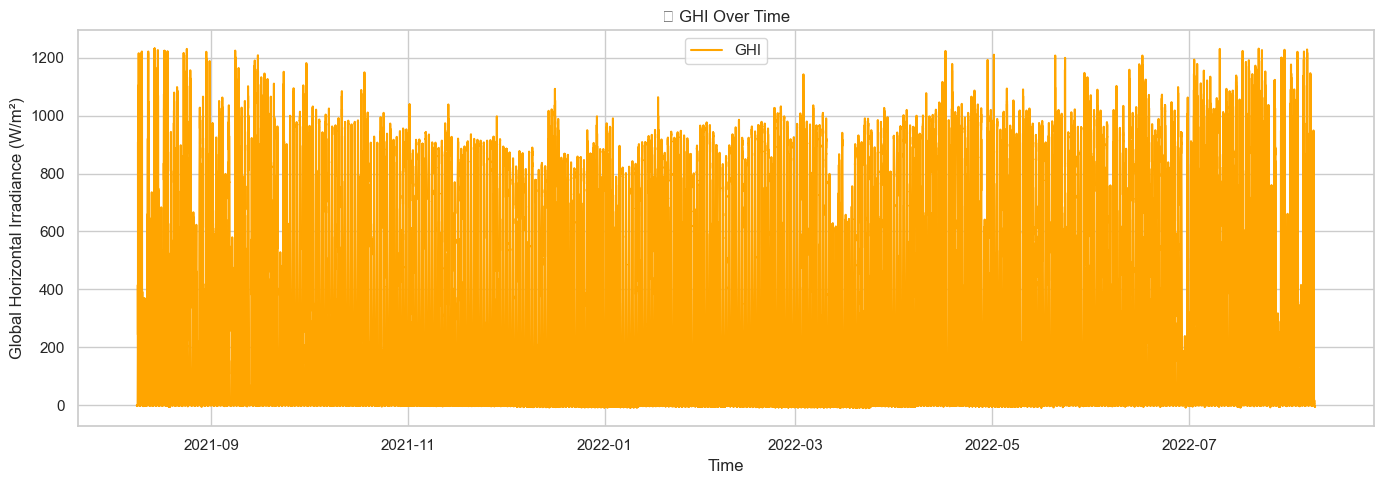

In [ ]:
# Parsing timestamp column to datetime
df_benin['Timestamp'] = pd.to_datetime(df_benin['Timestamp'])

# Sorting values by time (optional but helpful)
df_benin.sort_values('Timestamp', inplace=True)

# --- 1. Line chart: GHI over time ---
plt.figure(figsize=(14, 5))
plt.plot(df_benin['Timestamp'], df_benin['GHI'], label='GHI', color='orange')
plt.title("GHI Over Time")
plt.xlabel("Time")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.legend()
plt.tight_layout()
plt.show()

###  2. Monthly Trend (Bar Chart)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18136\391673903.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')


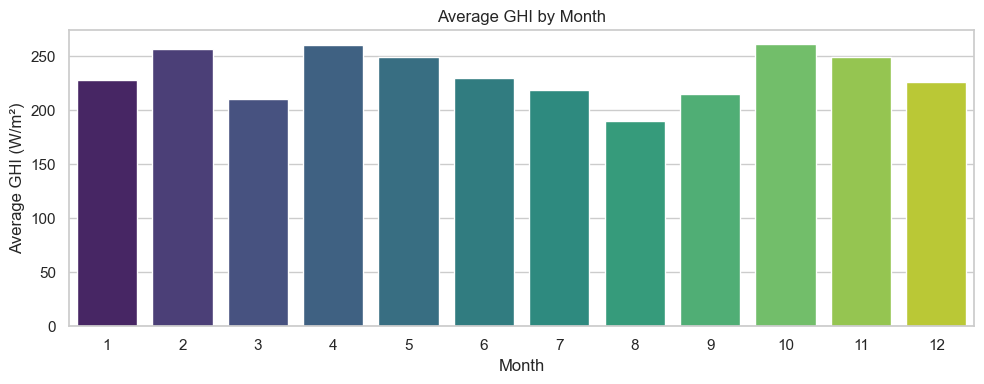

In [11]:
# Extracting month from timestamp
df_benin['Month'] = df_benin['Timestamp'].dt.month

# Grouping by month and calculating average GHI
monthly_avg = df_benin.groupby('Month')['GHI'].mean()

# Bar chart of average GHI by month
plt.figure(figsize=(10, 4))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')
plt.title("Average GHI by Month")
plt.xlabel("Month")
plt.ylabel("Average GHI (W/m²)")
plt.tight_layout()
plt.show()


### 3. Hourly Trend (Line Chart)

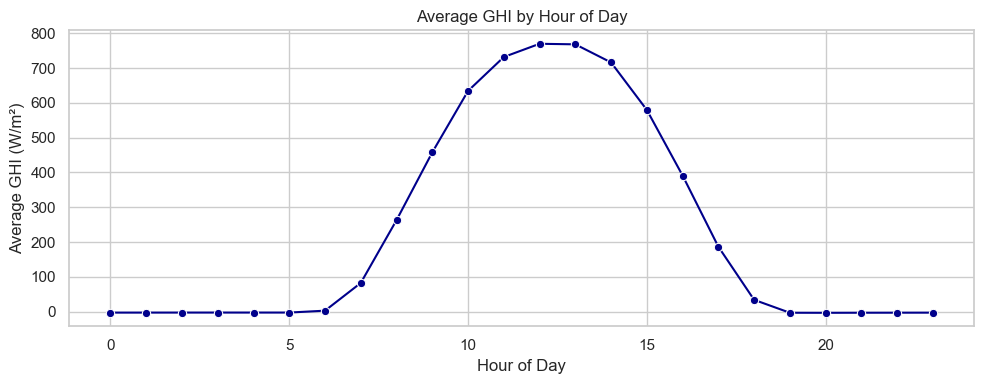

In [12]:
# Extracting hour of day
df_benin['Hour'] = df_benin['Timestamp'].dt.hour

# Grouping by hour and calculating average GHI
hourly_avg = df_benin.groupby('Hour')['GHI'].mean()

# Line chart of average GHI by hour
plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', color='darkblue')
plt.title("Average GHI by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average GHI (W/m²)")
plt.tight_layout()
plt.show()

### 